In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D 

In [2]:
# Leapfrog method

m = 100         # Number of spatial grid points
dx = 2.0/m      # grid size
epsilon = 1     # coupling term
beta = 0.1      # ratio of step sizes
dt = beta*dx    # time step size

# Spatial Points
x = [i*dx for i in range(m+1)]

# Time points
tmax = 0.15
n = int(tmax/dt)     # Number of time points
t = [dt*i for i in range(1,n+1)]

# Initial Data
u0 = [3.0*np.sin(3.14*i*dx) for i in range(m+1)]

# Solution Data
soln = np.array(u0)
u = u0.copy()
u[0] = 0
u[m] = 0

test = np.zeros((n,m+1))
test[0] = u0


for i in range(m+1):
    if x[i] == 0 or x[i] == 2: # Skip at endpoints
        continue
    u[i] = u0[i] - beta*(u0[i+1]*u0[i+1] - u0[i]*u0[i])
soln = np.vstack([soln, u])
test[1] = u

for k in range(2, n):
    for i in range(m+1):
        if x[i]==0 or x[i]==2:
            continue
        test[k,i] = test[k-2,i]-beta*(test[k-1,i+1]*test[k-1,i+1]-test[k-1,i-1]*test[k-1,i-1])/2.0
        

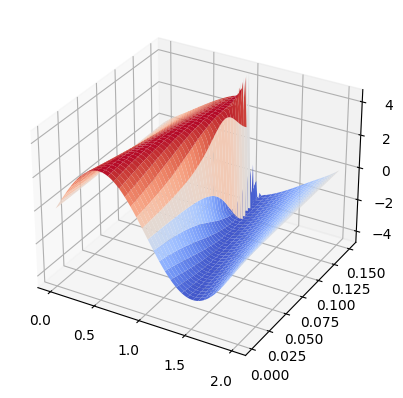

In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

X = np.array(x)
T = np.array(t)
X, T = np.meshgrid(X,T)
#print(test.shape, X.shape, T.shape)
surf = ax.plot_surface(X,T,test, cmap=cm.coolwarm)

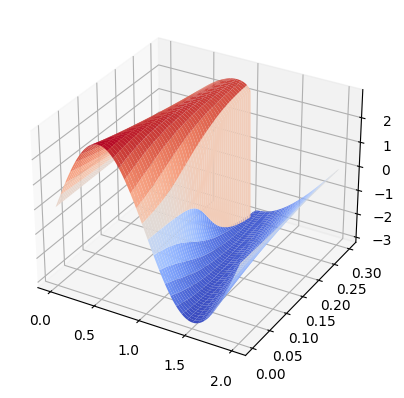

In [4]:
# Lax-Wendroff Method

m = 100         # Number of spatial grid points
dx = 2.0/m      # grid size
epsilon = 1     # coupling term
beta = 0.1      # ratio of step sizes
dt = beta*dx    # time step size

# Spatial Points
x = [i*dx for i in range(m+1)]

# Time points
tmax = 0.3
n = int(tmax/dt)     # Number of time points
t = [dt*i for i in range(1,n+1)]

# Initial Data
tmp0 = [3.0*np.sin(3.14*i*dx) for i in range(m+1)]

# Solution Data
tmp = tmp0.copy()
tmp[0] = 0
tmp[m] = 0

test = np.zeros((n,m+1))
test[0] = u0

for k in range(1, n):
    for i in range(m+1):
        if x[i]==0 or x[i]==2:
            continue
        test[k,i] = test[k-1,i]-beta*(test[k-1,i]*test[k-1,i]-test[k-1,i-1]*test[k-1,i-1])/4.0 + beta*beta*((test[k-1,i+1]+test[k-1,i])*(test[k-1,i+1]*test[k-1,i+1]-test[k-1,i]*test[k-1,i])-(test[k-1,i]+test[k-1,i-1])*(test[k-1,i]*test[k-1,i]-test[k-1,i-1]*test[k-1,i-1]))
        
        #test[k,i] = test[k-2,i]-beta*(test[k-1,i+1]*test[k-1,i+1]-test[k-1,i-1]*test[k-1,i-1])/2.0

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

X = np.array(x)
T = np.array(t)
X, T = np.meshgrid(X,T)
#print(test.shape, X.shape, T.shape)
surf = ax.plot_surface(X,T,test, cmap=cm.coolwarm)

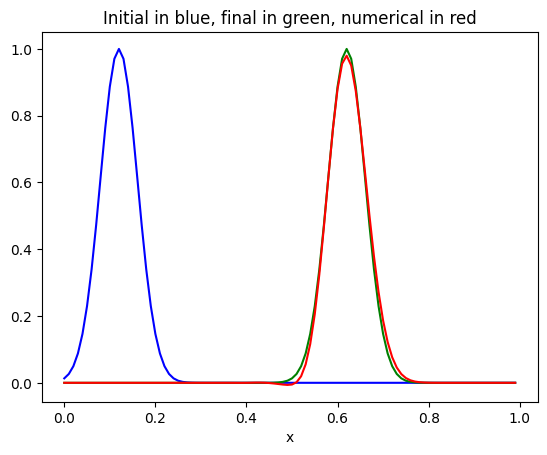

In [5]:
from numpy import *
import numpy as np, matplotlib.pyplot as plt

N=100; c=1.; dx=1./N; beta=0.8
dt=beta*dx/c; T_final=0.5; n=int(T_final/dt)
u0=[]; uf=[]; xx=[]; u=np.zeros((N+1),float)
plt.figure(0)

def plotIniExac(): # Plot initial and exact solution
    for i in range(0,N):
        x=i*dx
        xx.append(x)
        u0.append(exp(-300.*(x-0.12)**2)) # Gaussian initial data
        uf.append(exp(-300.*(x-0.12-c*T_final)**2))
    plt.plot(xx,u0,'b')
    plt.plot(xx,uf,'g')
plotIniExac()

def numerical():
    for j in range(0,n+1):
        for i in range(0,N-2):
            u[i+1]=(1.-beta*beta)*u0[i+1]-(0.5*beta)*(1.-beta)*u0[i+2]+0.5*beta*(1.+beta)*u0[i]
            u[0]=0.
            u[N-1]=0. 
            u0[i] = u[i]
    plt.plot(xx,u[:-1],'r')
    
numerical()
plt.title('Initial in blue, final in green, numerical in red')
plt.xlabel('x')
plt.show()